# Домашнее задание к лекции "Визуализация данных"

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [225]:
# данные об уровне счастья в разных странах за 2019 и 2015 годы
df_2019 = pd.read_csv('/Users/zorinapancenko/Desktop/python/Downloads/archive/2019.csv').rename(columns={'Country or region': 'Country'})
df_2015 = pd.read_csv('/Users/zorinapancenko/Desktop/python/Downloads/archive/2015.csv').rename(columns={'Happiness Rank': 'Overall rank', 'Happiness Score': 'Score', 'Health (Life Expectancy)': 'Healthy life expectancy'})
df_2019.head(10)


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


ДАННЫЕ ВЗЯТЫ ИЗ https://www.kaggle.com/unsdsn/world-happiness

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

### 1 визуализация

Text(0.5, 1.0, 'Contribution of corruption perception in different countries to the overall hapiness score')

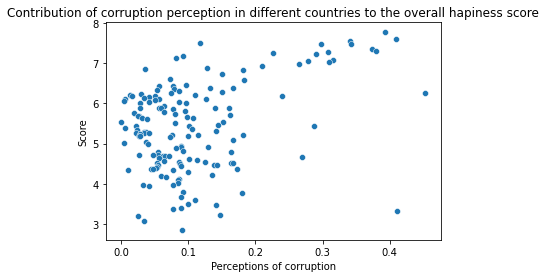

In [193]:
sns.scatterplot(data=df_2019, x="Perceptions of corruption", y="Score")
plt.title("Contribution of corruption perception in different countries to the overall hapiness score")

Из графика видно, что восприятие коррупции в странах с низким и средним уровнем счастья не оказало весомое влияние на итоговую оценку (большая часть значений сосредоточена в интервале от 0 до 0.2). 

Однако есть несколько стран с высоким уровнем счастья (от 7 до 8 пунктов), где отношение к коррупции оказало более значимое влияние на итоговую оценку. 

Гипотеза: в среднем у граждан топ-10 самых счастливых стран мира наличие/отсутствие коррупции играет более важную роль, чем у граждан менее счастливых стран.

In [144]:
import warnings

warnings.filterwarnings('ignore')

### 2 визуализация

Text(0.5, 1.0, 'Top 10 happiest countries in 2019')

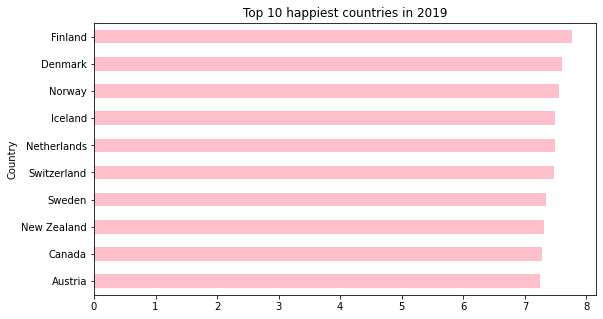

In [174]:
df_2019.groupby('Country')['Score'].max().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(9,5),color='pink').invert_yaxis()
plt.title('Top 10 happiest countries in 2019')


Text(0.5, 1.0, 'Top 10 happiest countries in 2015')

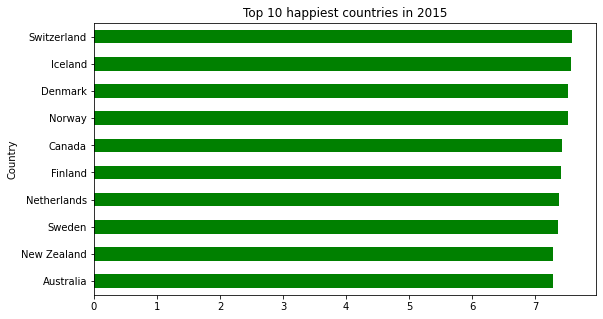

In [175]:
df_2015.groupby('Country')['Score'].max().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(9,5),color='green').invert_yaxis()
plt.title('Top 10 happiest countries in 2015')

Состав топ-10 самых счастливых стран претерпел изменения за 4 года: к 2019 году первенство перешло от Швейцарии Скандинавским странам (Финляндия, Дания и Норвегия), Швейцария же ушла на 6 место.

Гипотеза: за исследуемый период уровень жизни в Скандинавских странах странах существенно увеличился, что повлияло и на рост уровня счастья. При этом в Швейцарии уровень счастья снизился, по этой причине ее также обогнала Голландия.

### 3 визуализация

<AxesSubplot:title={'center':'Distribution of social support and GDP per capita contribution to the hapiness score in different countries'}>

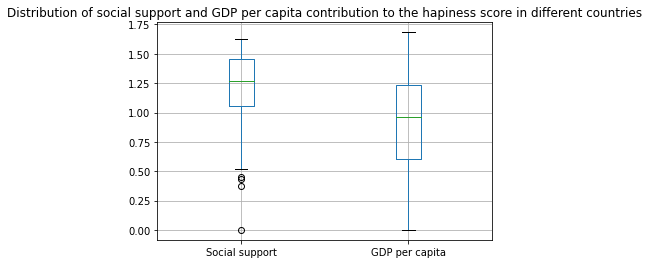

In [198]:
df_2019[['Social support', 'GDP per capita']].plot(kind='box',
                               title='Distribution of social support and GDP per capita contribution to the hapiness score in different countries',
                              grid=True)

В распределении показателя социальной поддержи можно заметить несколько нижних выбросов, в распределении показателя ВВП на душу их нет.

Медина показателя социальной поддержки примерно равна 1.25, а медиана показателя ВВП на душу населения составляет чуть менее 1.0.

Гипотеза: социальная поддержка граждан государством в среднем оказывает более сильное влияние на уровень счастья, чем ВВП на душу населения (50% значений социальной поддержки лежат в интервале от 1 до 1.5, а 50% значений ВВП на душу населения находятся в интервале от 0.6 до 1.25).

### 4 визуализация

In [196]:
spearman_cormatrix = df_2019.drop('Overall rank', axis=1).corr(method='spearman')
spearman_cormatrix

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


Text(0.5, 1.0, "Correlation between factors that influence countries' hapiness scores")

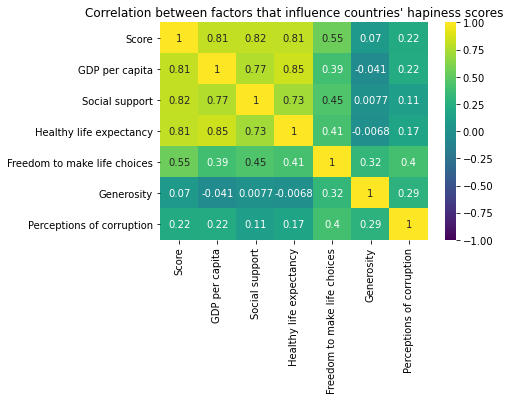

In [228]:
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, center=0, cmap="viridis", annot=True)
plt.title("Correlation between factors that influence countries' hapiness scores")

Данная тепловая карта иллюстрирует взаимосвязь факторов, повлиявших на уровень счастья в разных странах, друг с другом.

Взаимосвязь таких факторов, как ВВП на душу населения, социальная поддержка и продолжительность здоровой жизни, с итоговой оценкой уровня счастья являится наиболее сильной (коэф. корреляции 0.81-0.82).

Показатели щедрости и ВВП на душу, а также щедрости и продолжительности здоровой жизни населения отрицательно коррелируют друг с другом.

Гипотеза: благотворительная деятельность (щедрость), направленная на поддержку бедных и развивающихся стран, приводит к оттоку капитала из развитых стран и как следствие сокращает показатель дохода на душу населения (несущественно, тк коэфф. корреляции далек от -1).

### 5 визуализация

In [237]:
print('Contribution of freedom factor in different countries to their hapiness score')
df_2015.loc[10:20][['Country', 'Freedom']].style.bar(align='mid')

Contribution of freedom factor in different countries to their hapiness score


,Country,Freedom
10,Israel,0.413190
11,Costa Rica,0.633760
12,Austria,0.624330
13,Mexico,0.481810
14,United States,0.546040
15,Brazil,0.490490
16,Luxembourg,0.615830
17,Ireland,0.617770
18,Belgium,0.584500
19,United Arab Emirates,0.641570


Гипотеза: свобода принятия решений не является ключевым фактором счастья. Так в Израиле этот показатель намного ниже, чем в Австрии и Коста-Рике, но тем не менее Израиль по методологии оценки в 2015 году считался более счастливым государством.